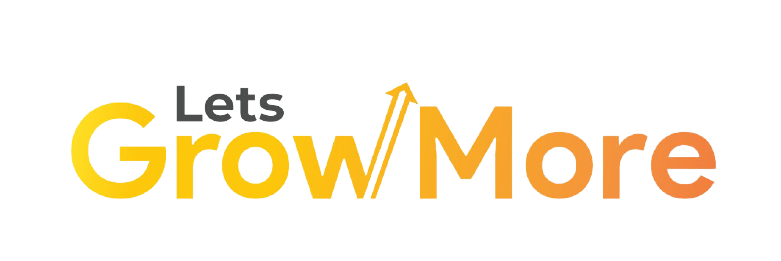

## LetsGrowMore VIP Data Science

### Task 2 - Stock Market Prediction and Forecasting using Stacked LSTM

### Code Auther - Manoj Kumar

### Importing Modules

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow
import warnings
warnings.simplefilter("ignore")

### Load the Datasets

In [2]:
stockdata=pd.read_csv('NSE-TATAGLOBAL.csv')
stockdata.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
stockdata.shape

(2035, 8)

### Data Cleaning

In [4]:
stockdata.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [5]:
missing_values=stockdata.isnull().sum()
missing_values

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
total_cells = np.product(stockdata.shape)
print("Total no.of Cells:",total_cells)

Total no.of Cells: 16280


In [7]:
total_missing = missing_values.sum()
print("No. of Missing Values:",total_missing)

No. of Missing Values: 0


In [8]:
NAN = [(c, stockdata[c].isnull().mean()*100) for c in stockdata]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


#### The Data is Cleaned and it doesn't contains any missing values and null values ,So now the data is ready to analyse 

### Analyse and Visualize

In [9]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
stockdata.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [11]:
stockdata.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

### Visualization

<AxesSubplot: >

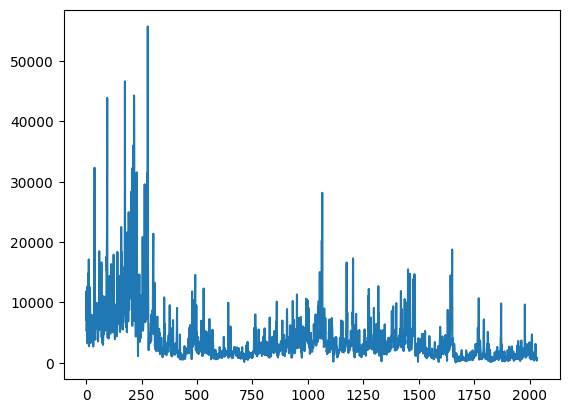

In [12]:
stockdata['Turnover (Lacs)'].plot()

<AxesSubplot: >

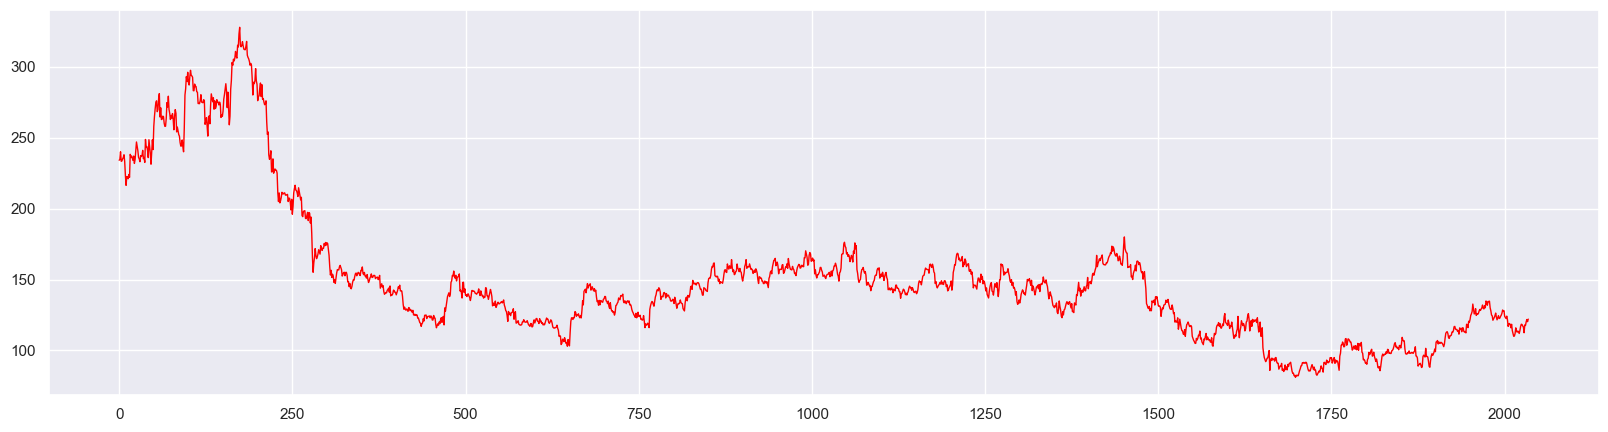

In [13]:
sns.set(rc = {'figure.figsize': (20, 5)})
stockdata['Open'].plot(linewidth = 1,color='red')

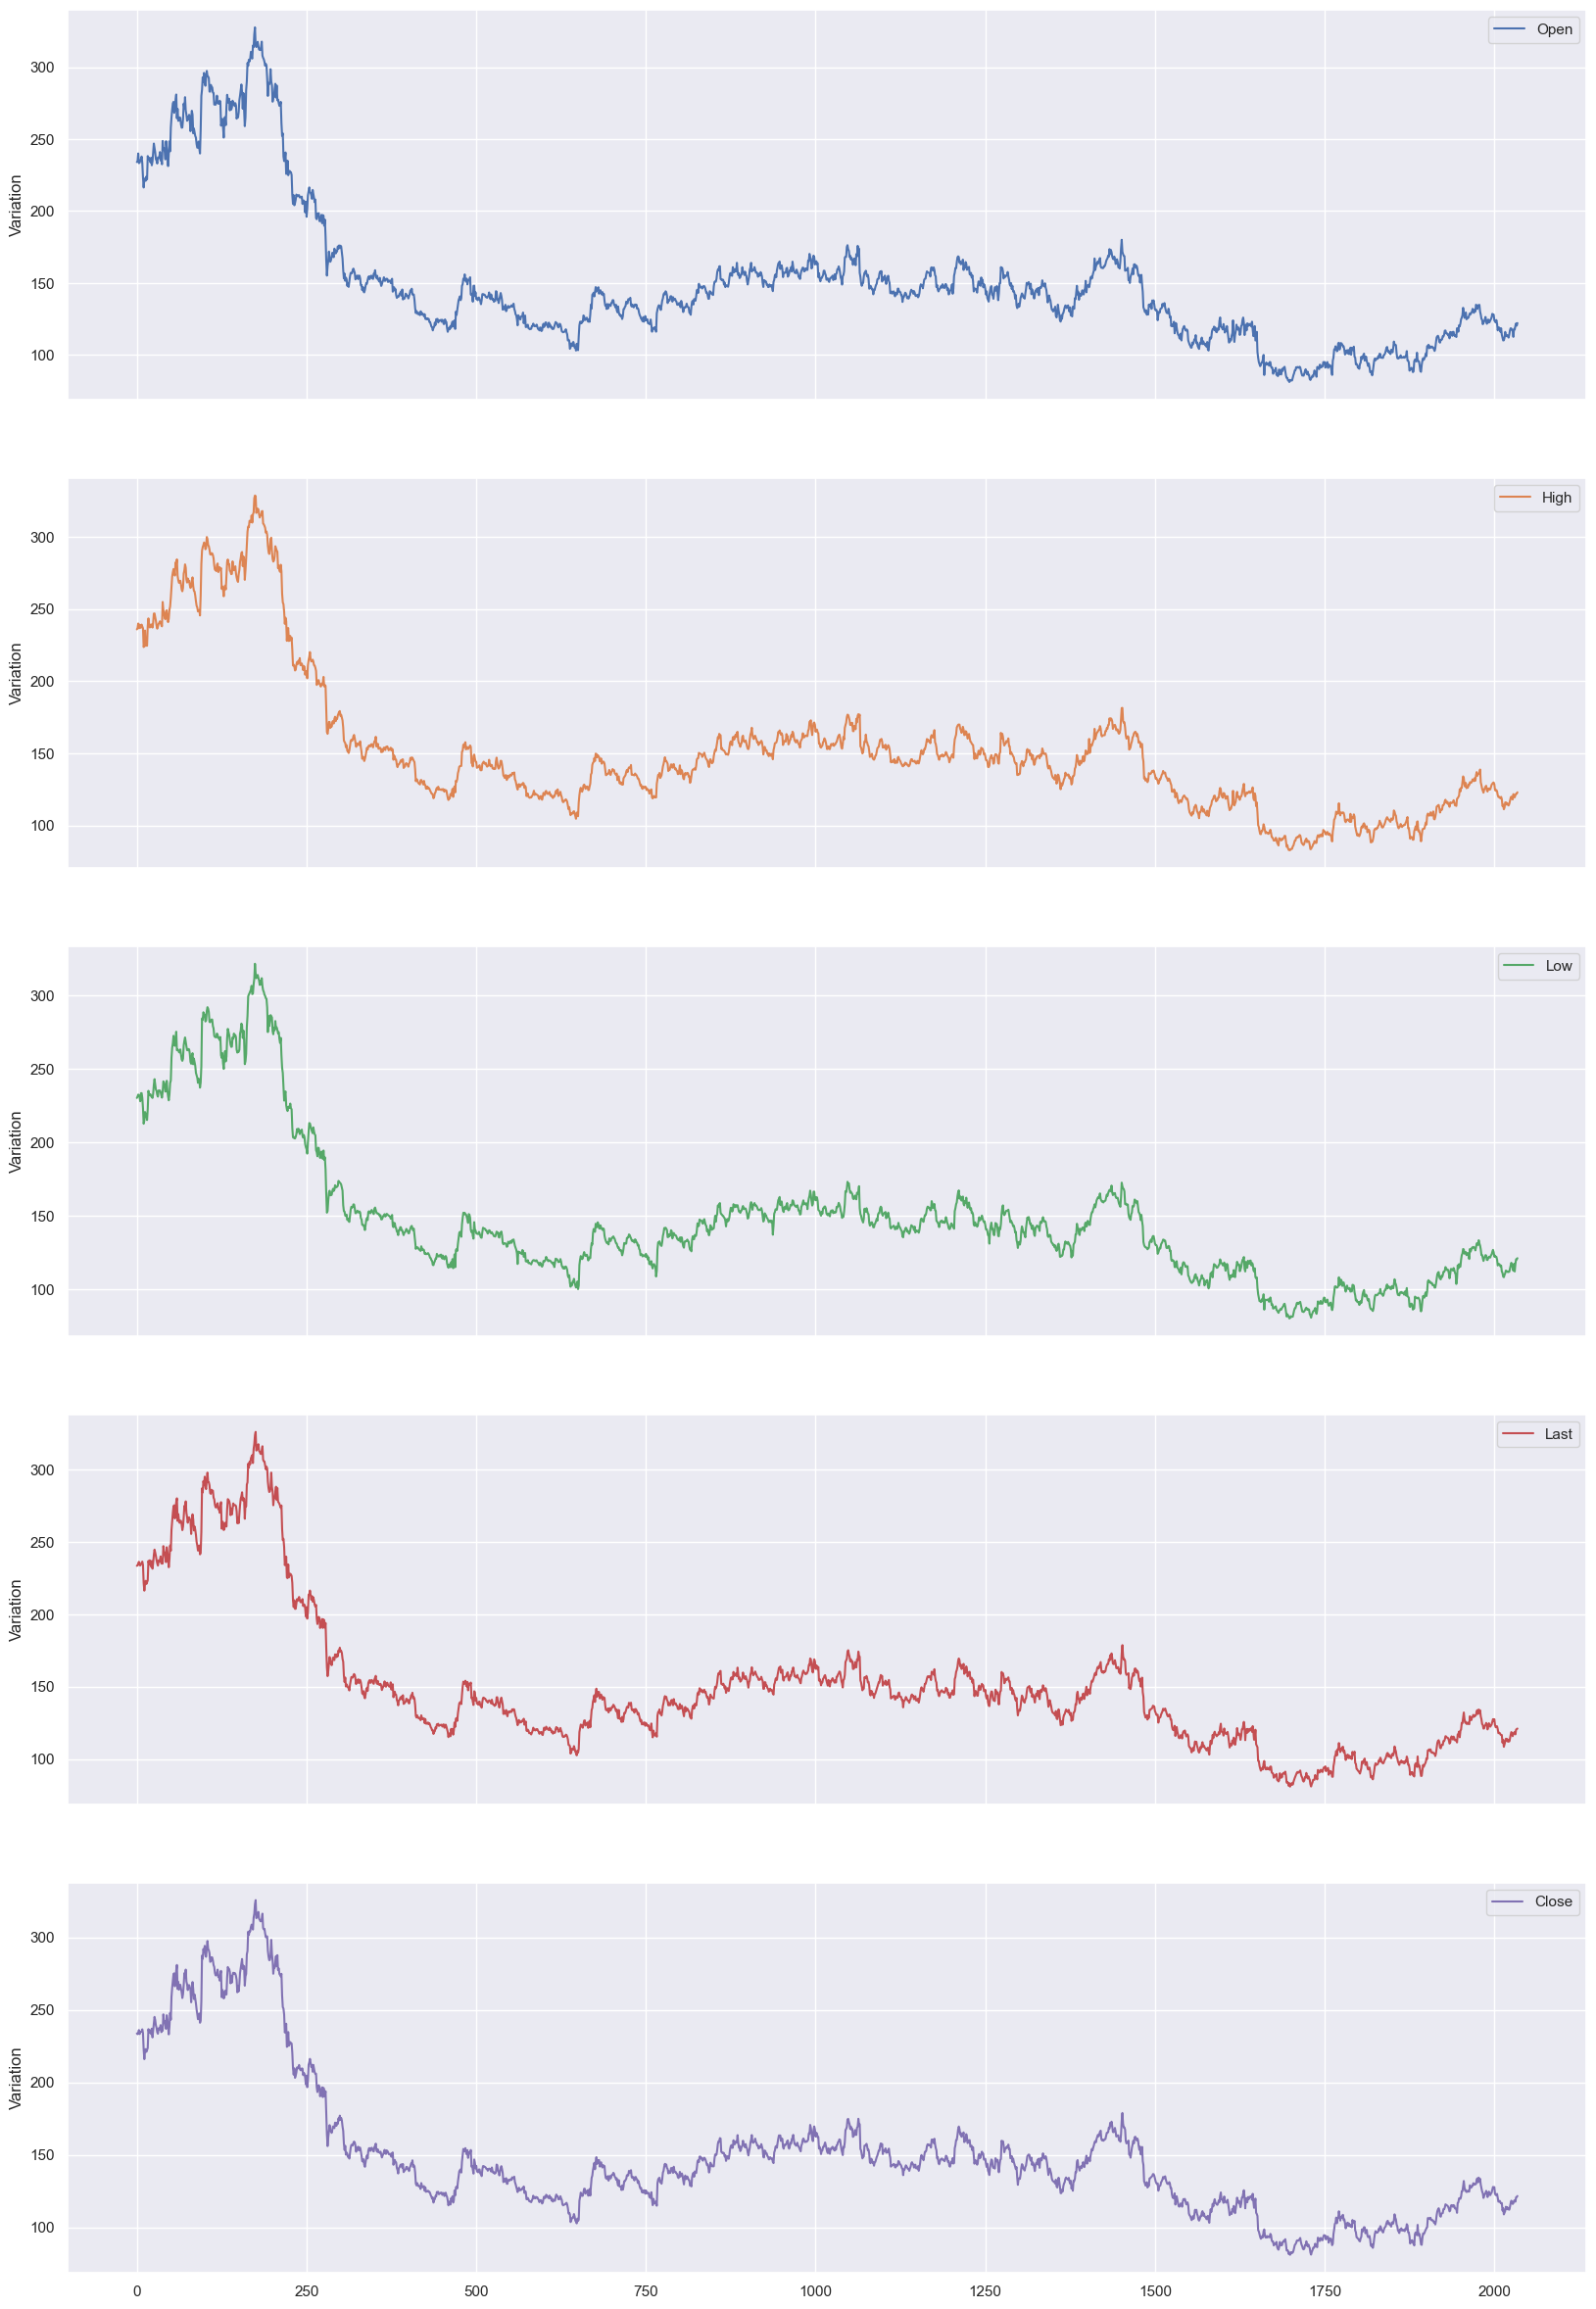

In [14]:
cols_plot = ['Open','High','Low','Last','Close']
axes = stockdata[cols_plot].plot(alpha =1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

### Create a Training set and Test set 

In [15]:
stockdata2=stockdata.reset_index()['Open']
stockdata2

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

#### Scaling

In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
stockdata2=scaler.fit_transform(np.array(stockdata2).reshape(-1,1))
stockdata2

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [17]:
train_size=int(len(stockdata2)*0.75)
test_size=len(stockdata2)-train_size
train_data=stockdata2[0:train_size,:]
test_data=stockdata2[train_size:len(stockdata2),:1]

In [18]:
print("Train Size:",train_size)
print("Test size:",test_size)

Train Size: 1526
Test size: 509


In [19]:
print("Train Data :\n",train_data)
print("Test Data :\n",test_data)

Train Data :
 [[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.18491484]
 [0.15774534]
 [0.16180049]]
Test Data :
 [[0.15774534]
 [0.15774534]
 [0.16991079]
 [0.13746959]
 [0.14963504]
 [0.16605839]
 [0.15369019]
 [0.14152474]
 [0.13341444]
 [0.13260341]
 [0.12368208]
 [0.12246553]
 [0.13625304]
 [0.11719384]
 [0.13746959]
 [0.15004055]
 [0.15308191]
 [0.15794809]
 [0.15186537]
 [0.14557989]
 [0.14497161]
 [0.14801298]
 [0.14476886]
 [0.11719384]
 [0.11151663]
 [0.10563666]
 [0.10218978]
 [0.09712084]
 [0.09691809]
 [0.11131387]
 [0.10644769]
 [0.11111111]
 [0.1202352 ]
 [0.11922141]
 [0.13219789]
 [0.10969181]
 [0.11232766]
 [0.10097324]
 [0.09712084]
 [0.09326845]
 [0.10948905]
 [0.10725872]
 [0.11719384]
 [0.12530414]
 [0.10705596]
 [0.11516626]
 [0.11111111]
 [0.10604217]
 [0.10786699]
 [0.10117599]
 [0.10016221]
 [0.11293593]
 [0.09144363]
 [0.08880779]
 [0.10908354]
 [0.12550689]
 [0.1216545 ]
 [0.12550689]
 [0.14294404]
 [0.14882401]
 [0.14882401]
 [0.15632603]
 [0.1459854 ]
 

In [20]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return np.array(train_X), np.array(train_Y)

### Creating & Testing the LSTM model

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
model.compile(loss='mse',optimizer='rmsprop')

In [60]:
model.fit(X_train,y_train,batch_size=512,epochs=10,validation_split=0.05)

Epoch 1/10
3/3 [==============================] - 2s 788ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 2/10
3/3 [==============================] - 2s 775ms/step - loss: 0.0017 - val_loss: 8.5012e-04
Epoch 3/10
3/3 [==============================] - 2s 757ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 4/10
3/3 [==============================] - 2s 725ms/step - loss: 0.0017 - val_loss: 9.3954e-04
Epoch 5/10
3/3 [==============================] - 2s 767ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 6/10
3/3 [==============================] - 2s 767ms/step - loss: 0.0014 - val_loss: 9.3865e-04
Epoch 7/10
3/3 [==============================] - 2s 784ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 8/10
3/3 [==============================] - 2s 775ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 9/10
3/3 [==============================] - 2s 764ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 10/10
3/3 [==============================] - 2s 775ms/step - loss: 0.0015 - val_loss: 8.4679e-04


In [56]:
data_test=pd.read_csv('Sample_Stock_test.csv')
real_stock_price = data_test.iloc[:, 1:2].values

In [57]:
data_total = pd.concat((stockdata['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

In [58]:
x_test = []
for i in range(60, 76):
    x_test.append(inputs[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

13/13 [==============================] - 1s 40ms/step


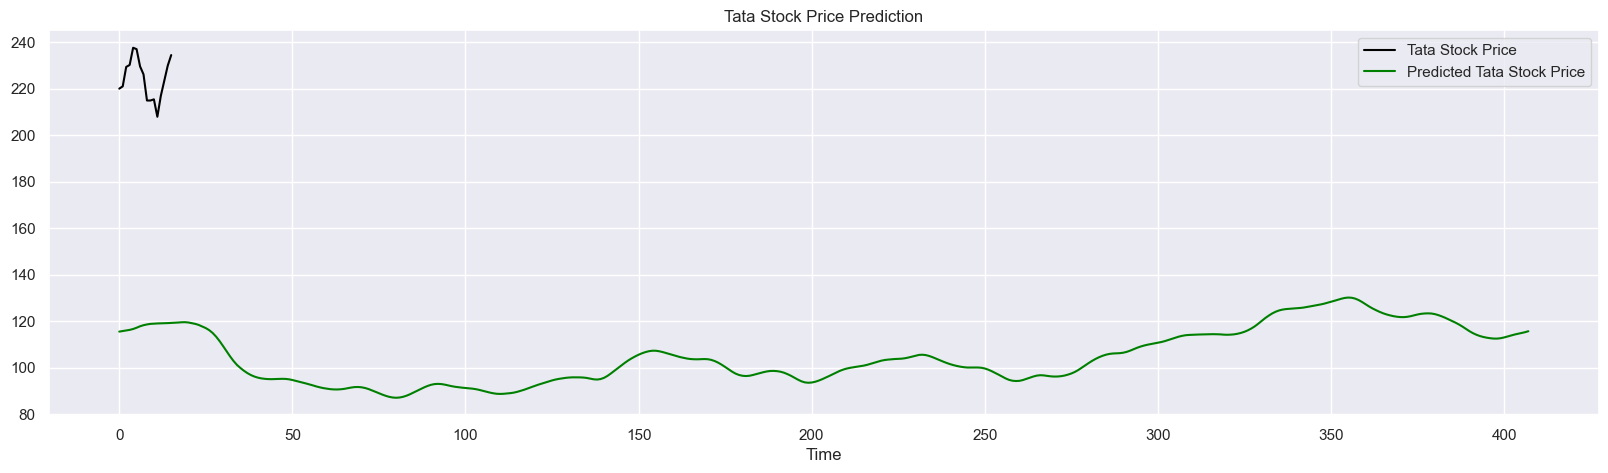

In [62]:
plt.plot(real_stock_price, color = 'black', label = 'Tata Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Tata Stock Price')
plt.title('Tata Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel = ('Tata Stock Price')
plt.legend()
plt.show()


### Summary

#### In this project ,we predict the stock market data using Machine Learning Techniques,by using this LSTM techniques we can predict the stock values 